<a href="https://colab.research.google.com/github/bigboivan/MAT422/blob/main/HW9_MAT422.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework on Section 3.4 - Logistic Regression.
A logistic function is a common S-shaped sigmoid curve with equation:
f(x) = L/(1+ e^(x-x0)).
The standard logistic function with L = 1, k=1, and x0 = 0, f(x) = 1/(1+e^(-x)).
Logistic regression uses the logistic function to model the log-odds or logit of an event. This is used in predictive modeling to take previous events/data to predict some future outcome or dataset. Below, we perform logistic regression on heart health data and see if selecting certain columns can predict the heart disease risk score.

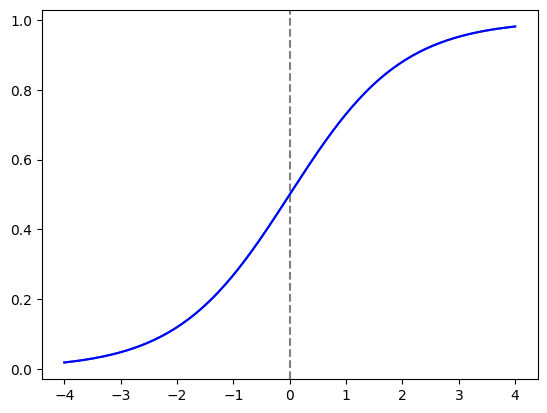

In [38]:
#Section 3.4 - Ivan Matyushov
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Standard logistic function Plot
x = np.linspace(-4,4, 200)
y = 1/(1+np.exp(-x)) #standard logistic function equation

fig, ax = plt.subplots()
ax.plot(x, y)
ax.axvline(x=0, color='gray', linestyle='--')
plt.plot(x, y, 'b-')

In [45]:
# Logistic Regression w/ 3 data columns
df = pd.read_csv('heart_disease.csv')
chol = df['chol'] #Cholesterol levels
r_bp = df['resting_BP'] #Resting heart rate
r_bp = r_bp.astype(int)
age = df['age'] #Age of patients
hdrs = df['Heart Disease Risk Score'] #Heart Disease Risk Score data

data = {'Column1': chol, 'Column2': r_bp, 'Column3': age}
df1 = pd.DataFrame(data=data, dtype=np.int8)
hdrs = pd.DataFrame(data=hdrs, dtype=np.int8)

#Splitting Data
X_train, X_test, y_train, y_test = train_test_split(
    df1, hdrs, test_size=0.2, random_state=42)

#Scaling Data
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)

#Logistic Regression of Data
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(df1, hdrs)




#Prediction of data & Confusion Matrix
x_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred) #Gives array of correct predictions made

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  4,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 16, 14,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  4,  6, 12,  1, 11,  1,  0,  0,  0],
       [ 0,  2,  6,  1,  7,  0, 12,  2,  0,  0,  0],
       [ 0,  0,  9,  7,  2,  1, 10,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  4,  3, 17,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  3,  0,  8,  4,  0,  0,  0],
       [ 0,  1,  0,  1,  0,  0,  7,  3,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  2,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]])

In [41]:
#Finding the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('The accuracy of the model was: ', accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

The accuracy of the model was:  0.30917874396135264

Classification Report:
               precision    recall  f1-score   support

           7       0.00      0.00      0.00         6
           8       0.57      0.76      0.65        17
           9       0.41      0.53      0.46        30
          10       0.19      0.17      0.18        36
          11       0.25      0.23      0.24        30
          12       0.20      0.03      0.06        29
          13       0.25      0.63      0.36        27
          14       0.33      0.25      0.29        16
          15       0.00      0.00      0.00        12
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         1

    accuracy                           0.31       207
   macro avg       0.20      0.24      0.20       207
weighted avg       0.26      0.31      0.26       207



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [49]:
#Logistic Regression with 4 columns of data sets.
fbs = df['fbs']
fbs = fbs.astype(int)
data2 = {'Column1': chol, 'Column2': r_bp, 'Column3': age, 'Column4': fbs}

df2 = pd.DataFrame(data=data2, dtype=np.int8)
hdrs = pd.DataFrame(data=hdrs, dtype=np.int8)


X_train, X_test, y_train, y_test = train_test_split(
    df2, hdrs, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(df2, hdrs)

x_test = scaler.transform(X_test)
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 12,  4,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 16, 14,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  2, 19, 11,  2,  0,  1,  0,  0,  0],
       [ 0,  2,  2,  2, 10,  0, 12,  1,  1,  0,  0],
       [ 0,  0,  6,  6,  8,  2,  7,  0,  0,  0,  0],
       [ 0,  0,  1, 12,  5,  0,  8,  1,  0,  0,  0],
       [ 0,  0,  0,  1,  9,  0,  4,  2,  0,  0,  0],
       [ 0,  1,  0,  0,  7,  0,  3,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1,  0,  2,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0]])

In [50]:
accuracy1 = accuracy_score(y_test, y_pred)
print('The accuracy of the model was: ', accuracy1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

The accuracy of the model was:  0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

           7       0.00      0.00      0.00         6
           8       0.55      0.71      0.62        17
           9       0.52      0.53      0.52        30
          10       0.35      0.53      0.42        36
          11       0.20      0.33      0.25        30
          12       0.50      0.07      0.12        29
          13       0.22      0.30      0.25        27
          14       0.40      0.12      0.19        16
          15       0.00      0.00      0.00        12
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         1

    accuracy                           0.33       207
   macro avg       0.25      0.24      0.22       207
weighted avg       0.34      0.33      0.30       207



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


As we added a 4th column of data from the original dataset, the model became slightly more accurate with predictions of the heart disease risk score.